# Funções para geração de resultados para algoritmo exaustivo

In [18]:
varia_filmes = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
varia_categorias = [2, 4, 8]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt inputs_exaustiva/in-{i}-{j}.txt

In [19]:
# Gera outputs e mede tempo de execução
import time
import os

def get_files_in_directory(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_list.append(file)
    return file_list

# Specify the directory path
directory_path = 'inputs_exaustiva'

# Call the function to get the list of files
files = get_files_in_directory(directory_path)


runtime_gpu = {}
runtime_openMP = {}
runtime_exhaustive = {}

amount_of_films_gpu = {}
amount_of_films_openMP = {}
amount_of_films_exhaustive = {}


for file in files:
    start_time = time.time()
    !./exaustiva_OpenMP inputs_exaustiva/{file} > outputs_exaustiva/out-openMP-{file}
    runtime_openMP[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-openMP-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_openMP[file] = int(first_line.split(' ')[0])

for file in files:
    start_time = time.time()
    !./exaustiva inputs_exaustiva/{file} > outputs_exaustiva/out-exhaustive-{file}
    runtime_exhaustive[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-exhaustive-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_exhaustive[file] = int(first_line.split(' ')[0])

for file in files:
    start_time = time.time()
    print
    !./exaustiva_gpu inputs_exaustiva/{file} > outputs_exaustiva/out-gpu-{file}
    runtime_gpu[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-gpu-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_gpu[file] = int(first_line.split(' ')[0])


In [20]:
# Gera arquivo csv com tempos de execução
import csv

with open('outputs_exaustiva/data_exaustiva.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['num_filmes','num_categorias', 'runtime_openMP', 'runtime_exhaustive', 'runtime_gpu', 'amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu'])
    for input_value in runtime_openMP.keys():
        num_filmes = input_value.split('-')[1]
        num_categorias = input_value.split('-')[2].split('.')[0]
        writer.writerow([num_filmes, num_categorias, runtime_openMP[input_value], runtime_exhaustive[input_value], runtime_gpu[input_value], amount_of_films_openMP[input_value], amount_of_films_exhaustive[input_value], amount_of_films_gpu[input_value]])


In [7]:
import pandas as pd

output_files = get_files_in_directory('outputs_exaustiva')
output_files = output_files[1:]
df = pd.read_csv("outputs_exaustiva/data_exaustiva.csv")



# Gráficos e Tabelas

In [20]:
# Tabela de tempo de execução
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs_exaustiva/data_exaustiva.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df = df.sort_values(['num_filmes', 'num_categorias'], ascending = [True, True])

df_runtime = df[['runtime_openMP', 'runtime_exhaustive', 'runtime_gpu']]

df_runtime

runtime_openMP  runtime_exhaustive  runtime_gpu
num_filmes num_categorias                                                 
10         2                     0.103699            0.103822     0.303674
           4                     0.102540            0.102894     0.203757
           8                     0.103098            0.102570     0.303740
12         2                     0.105223            0.104355     0.205376
           4                     0.102725            0.102396     0.203577
           8                     0.102889            0.104636     0.303657
14         2                     0.104337            0.103071     0.303933
           4                     0.104654            0.102713     0.206116
           8                     0.102707            0.103112     0.347842
16         2                     0.102961            0.102510     0.325201
           4                     0.103156            0.102895     0.304640
           8                     0.102449            0.102589     0.303811
18         2                     0.104572            0.102705     0.303818
           4                     0.104372            0.103849     0.304000
           8                     0.105489            0.102695     0.305941
20         2                     0.204335            0.202621     0.304177
           4                     0.303060            0.203895     0.303682
           8                     0.404899            0.506498     0.303870
22         2                     0.503471            0.604570     0.203375
           4                     0.904413            1.204824     0.313950
           8                     2.420463            2.508137     0.404878
24         2                     0.606334            1.004898     0.303756
           4                     1.105100            1.305577     0.317111
           8                     1.606743            1.206675     0.305418
26         2                     0.503183            0.603760     0.317449
           4                     4.212285            6.622214     0.303844
           8                    17.171644           20.554719     0.403755
28         2                     4.514297            4.314620     0.303883
           4                    33.535869           43.028122     0.504405
           8                    37.586896           44.607117     0.404240
30         2                    37.134244           42.409004     0.304219
           4                    15.679302           19.146940     0.403839
           8                    33.123616           38.591714     0.404261

In [21]:
# Tabela de quantidade de filmes
df_filmes = df[['amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu']]
df_filmes

amount_of_films_openMP  amount_of_films_exhaustive  \
num_filmes num_categorias                                                       
10         2                                    3                           3   
           4                                    6                           6   
           8                                    5                           5   
12         2                                    2                           2   
           4                                    5                           5   
           8                                    6                           6   
14         2                                    2                           2   
           4                                    4                           4   
           8                                    6                           6   
16         2                                    4                           4   
           4                                    7                           7   
           8                                    7                           7   
18         2                                    3                           3   
           4                                    7                           7   
           8                                    6                           6   
20         2                                    4                           4   
           4                                    7                           7   
           8                                    8                           8   
22         2                                    2                           2   
           4                                    8                           8   
           8                                    6                           6   
24         2                                    3                           3   
           4                                    6                           6   
           8                                    6                           6   
26         2                                    3                           3   
           4                                    6                           6   
           8                                    6                           6   
28         2                                    3                           3   
           4                                    9                           9   
           8                                    7                           7   
30         2                                    3                           3   
           4                                    6                           6   
           8                                    6                           6   

                           amount_of_films_gpu  
num_filmes num_categorias                       
10         2                                 3  
           4                                 6  
           8                                 5  
12         2                                 2  
           4                                 5  
           8                                 6  
14         2                                 2  
           4                                 4  
           8                                 6  
16         2                                 4  
           4                                 7  
           8                                 7  
18         2                                 3  
           4                                 7  
           8                                 6  
20         2                                 4  
           4                                 7  
           8                                 8  
22         2                                 2  
           4                                 8  
           8                                 6  
24         2                                 3  
           4   

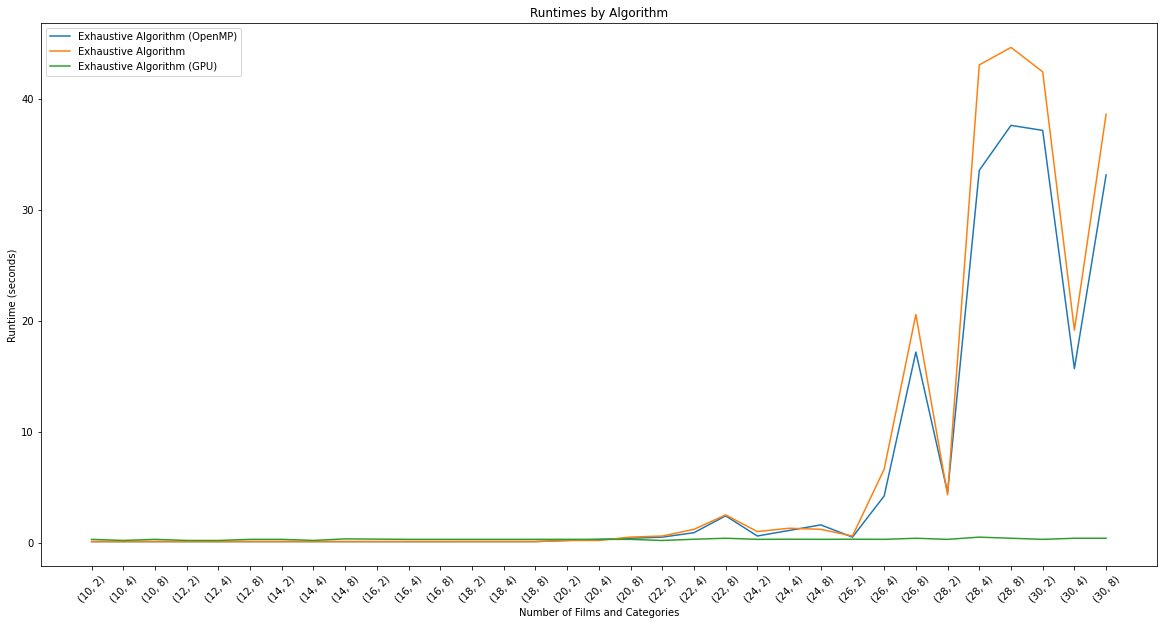

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
df_runtime['runtime_openMP'].plot(ax=ax, label='Exhaustive Algorithm (OpenMP)')
df_runtime['runtime_exhaustive'].plot(ax=ax, label='Exhaustive Algorithm')
df_runtime['runtime_gpu'].plot(ax=ax, label='Exhaustive Algorithm (GPU)')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
ax.set_xticks(range(len(df_runtime.index)))
ax.set_xticklabels(df_runtime.index, rotation=45)
plt.show()

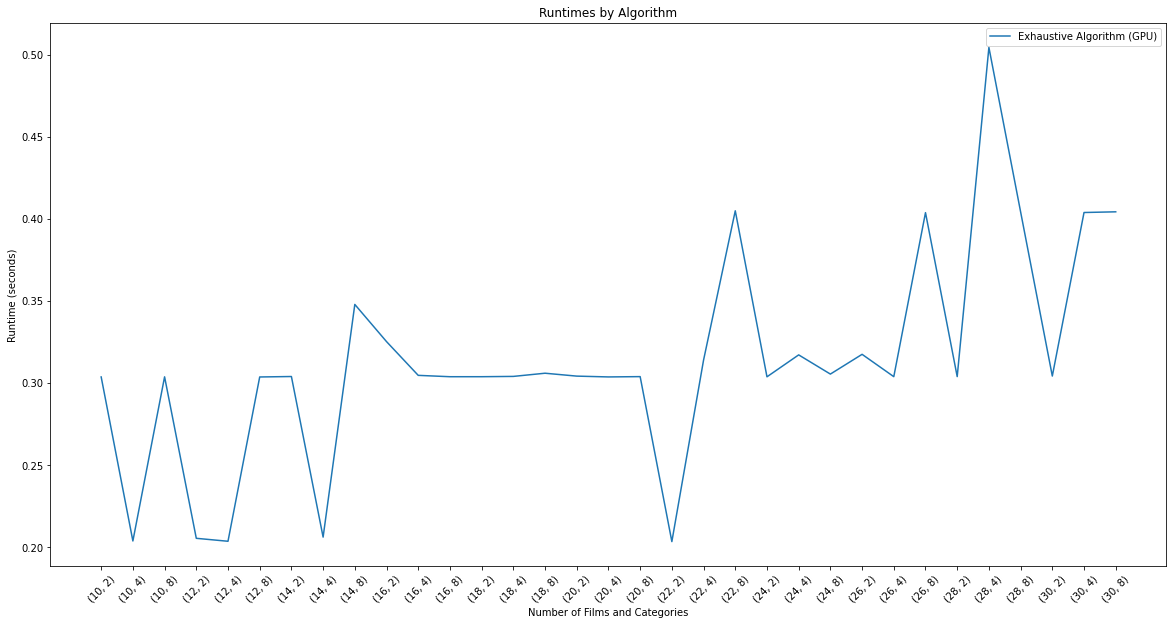

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
df_runtime['runtime_gpu'].plot(ax=ax, label='Exhaustive Algorithm (GPU)')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
ax.set_xticks(range(len(df_runtime.index)))
ax.set_xticklabels(df_runtime.index, rotation=45)
plt.show()